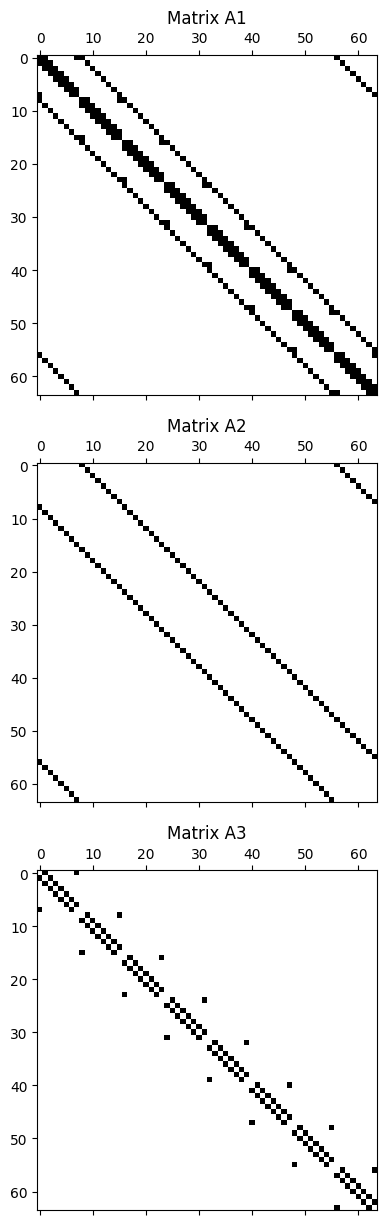

In [50]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

# Parameters
n = 8
L = 20  # domain size from -10 to 10, so total length is 20
h = L / n
N = n * n


# Matrix A aka A1

main_diag = -4 * np.ones(N)
y_diag = np.ones(N)
x_upper_diag = np.ones(N)
x_lower_diag = np.ones(N)
for i in range(n-1):
  x_upper_diag[(i + 1) * n] = 0
  x_lower_diag[(i + 1) * n - 1] = 0

diagonals = [
    main_diag,                    # Main diagonal
    x_upper_diag,                 # Right neighbor
    x_lower_diag,                 # Left neighbor
    y_diag,                       # Top neighbor
    y_diag                        # Bottom neighbor
]

offsets = [0, 1, -1, n, -n]

A_2D = spdiags(diagonals, offsets, N, N, format="lil") / h**2

for i in range(n):
    # Top-bottom wrap
    A_2D[i, i + N - n] = 1 / h**2
    A_2D[i + N - n, i] = 1 / h**2
    # Left-right wrap within rows
    A_2D[i * n, i * n + n - 1] = 1 / h**2
    A_2D[i * n + n - 1, i * n] = 1 / h**2

A1 = A_2D.todense()



# Matrix B aka A2
off_diag_x = np.ones(N)

diagonals_x = [off_diag_x, -off_diag_x, -off_diag_x, off_diag_x]
B_1D = spdiags(diagonals_x, [n, -n, N - n, n - N], N, N, format="lil") / (2 * h)

A2 = B_1D.todense()



# Matrix C aka A3

upper_diag = np.ones(N)
lower_diag = np.ones(N) * -1

for i in range(n-1):
  upper_diag[(i + 1) * n] = 0
  lower_diag[(i + 1) * n - 1] = 0

top_right_diag = np.zeros(N)
bottom_left_diag = np.zeros(N)

for i in range(n):
  top_right_diag[(i + 1) * n - 1] = -1
  bottom_left_diag[i * n] = 1

diagonals_c = [
    upper_diag,
    lower_diag,
    top_right_diag,
    bottom_left_diag
]

offsets_c = [1, -1, n-1, -n+1]

C_2D = spdiags(diagonals_c, offsets_c, N, N, format="lil") / (2 * h)

A3 = C_2D.todense()


# Plotting matrices

fig, axs = plt.subplots(3, 1, figsize=(15, 15))
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

ax1.spy(A1)
ax1.set_title('Matrix A1')
ax2.spy(A2)
ax2.set_title('Matrix A2')
ax3.spy(A3)
ax3.set_title('Matrix A3');

